In [1]:
!pip install gym matplotlib numpy


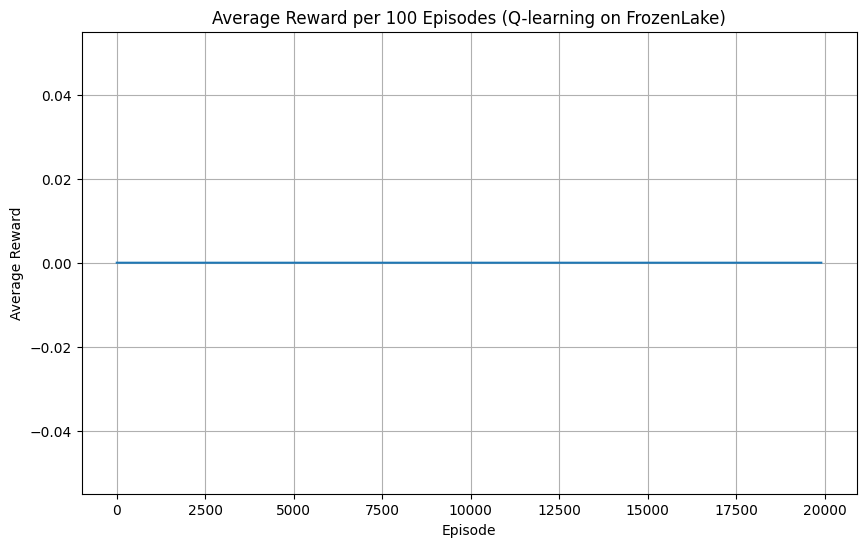

In [16]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Create environment
env = gym.make("FrozenLake-v1", is_slippery=False)  # deterministic version for easier learning

# Initialize Q-table with zeros (states x actions)
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
alpha = 0.8        # learning rate
gamma = 0.95       # discount factor
epsilon = 1.0      # exploration rate
epsilon_decay = 0.995
epsilon_min = 0.01
episodes = 20000
max_steps = 100

# For plotting rewards
rewards_all_episodes = []

for episode in range(episodes):
    state, info = env.reset()  # unpack reset() output properly
    done = False
    total_rewards = 0

    for step in range(max_steps):
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state,:])

        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Update Q-table
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        state = new_state
        total_rewards += reward

        if done:
            break

    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    rewards_all_episodes.append(total_rewards)


# Calculate rolling average of rewards
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

avg_rewards = moving_average(rewards_all_episodes, 100)

# Plot learning curve
plt.figure(figsize=(10,6))
plt.plot(avg_rewards)
plt.title("Average Reward per 100 Episodes (Q-learning on FrozenLake)")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.grid()
plt.show()


In [12]:
!pip install "gym[toy_text]"
!pip install pygame

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 23.9 MB/s eta 0:00:0000:01


In [17]:
import gym
from gym.wrappers import RecordVideo
import numpy as np
from IPython.display import Video
import glob

env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
env = RecordVideo(env, video_folder='./videos', episode_trigger=lambda episode_id: True)

Q = np.zeros((env.observation_space.n, env.action_space.n))  # dummy Q-table for demo

state, info = env.reset()
done = False

while not done:
    action = np.argmax(Q[state, :])
    state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

env.close()

videos = glob.glob('./videos/*.mp4')
if videos:
    display(Video(videos[-1], embed=True))
else:
    print("No video found.")


MoviePy - Building video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-0.mp4.
MoviePy - Writing video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-0.mp4


In [18]:
import gym
import numpy as np

env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")

Q = np.zeros((env.observation_space.n, env.action_space.n))

alpha = 0.8    # learning rate
gamma = 0.95   # discount factor
epsilon = 0.1  # exploration rate
episodes = 10000
total_rewards = []

for ep in range(episodes):
    state, info = env.reset()
    done = False
    ep_reward = 0
    while not done:
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state,:])
        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state,:]) - Q[state, action])
        state = new_state
        ep_reward += reward
    total_rewards.append(ep_reward)

print(f"Average reward over {episodes} episodes: {np.mean(total_rewards)}")


Average reward over 10000 episodes: 0.0


Episode 1000, Average Reward (last 1000): 0.1260, Epsilon: 0.6065
Episode 2000, Average Reward (last 1000): 0.4440, Epsilon: 0.3678
Episode 3000, Average Reward (last 1000): 0.6780, Epsilon: 0.2230
Episode 4000, Average Reward (last 1000): 0.8220, Epsilon: 0.1353
Episode 5000, Average Reward (last 1000): 0.8800, Epsilon: 0.0820
Episode 6000, Average Reward (last 1000): 0.9270, Epsilon: 0.0497
Episode 7000, Average Reward (last 1000): 0.9590, Epsilon: 0.0302
Episode 8000, Average Reward (last 1000): 0.9780, Epsilon: 0.0183
Episode 9000, Average Reward (last 1000): 0.9870, Epsilon: 0.0111
Episode 10000, Average Reward (last 1000): 0.9910, Epsilon: 0.0100
Episode 11000, Average Reward (last 1000): 0.9920, Epsilon: 0.0100
Episode 12000, Average Reward (last 1000): 0.9900, Epsilon: 0.0100
Episode 13000, Average Reward (last 1000): 0.9870, Epsilon: 0.0100
Episode 14000, Average Reward (last 1000): 0.9890, Epsilon: 0.0100
Episode 15000, Average Reward (last 1000): 0.9900, Epsilon: 0.0100
Epis

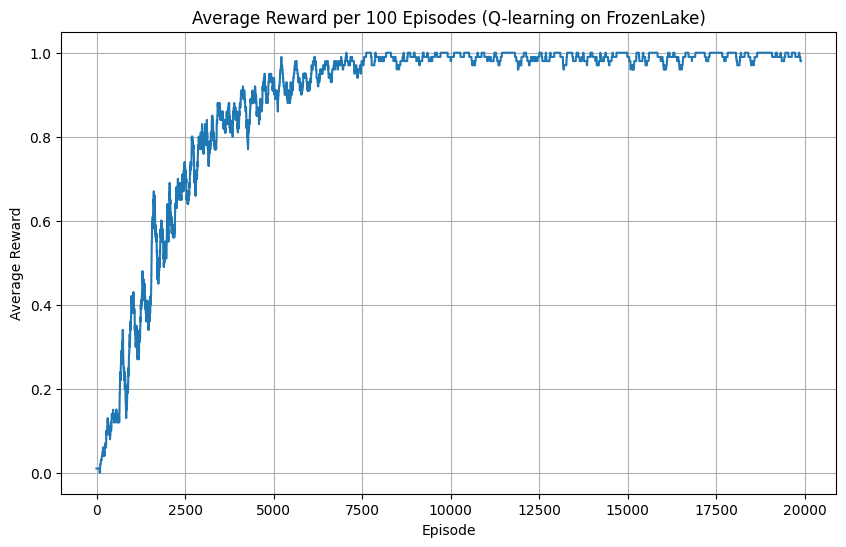

In [24]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1", is_slippery=False)

Q = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
alpha = 0.2        # Learning rate
gamma = 0.95       # Discount factor
epsilon = 1.0      # Exploration rate (start fully exploring)
epsilon_decay = 0.9995
epsilon_min = 0.01
episodes = 20000
max_steps = 100

rewards_all_episodes = []

for episode in range(episodes):
    state, _ = env.reset()
    done = False
    total_rewards = 0

    for step in range(max_steps):
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            max_q = np.max(Q[state,:])
            actions_with_max_q = np.where(Q[state,:] == max_q)[0]
            action = np.random.choice(actions_with_max_q)

        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Update to a new rule ( weird)
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state,:]) - Q[state, action])

        state = new_state
        total_rewards += reward

        if done:
            break

    
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    rewards_all_episodes.append(total_rewards)


    if (episode + 1) % 1000 == 0:
        avg_reward = np.mean(rewards_all_episodes[-1000:])
        print(f"Episode {episode+1}, Average Reward (last 1000): {avg_reward:.4f}, Epsilon: {epsilon:.4f}")

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

avg_rewards = moving_average(rewards_all_episodes, 100)

plt.figure(figsize=(10,6))
plt.plot(avg_rewards)
plt.title("Average Reward per 100 Episodes (Q-learning on FrozenLake)")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.grid()
plt.show()


In [25]:
import gym
import numpy as np
from gym.wrappers import RecordVideo

# Create environment with render_mode='rgb_array'
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")

# Wrap with RecordVideo to save episodes
env = RecordVideo(env, video_folder='./videos', episode_trigger=lambda episode_id: True)

# Use your trained Q-table (Q) here

num_episodes_to_record = 5
max_steps = 100

for episode in range(num_episodes_to_record):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        max_q = np.max(Q[state,:])
        actions_with_max_q = np.where(Q[state,:] == max_q)[0]
        action = np.random.choice(actions_with_max_q)

        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        total_reward += reward

    print(f"Episode {episode + 1} finished with reward {total_reward}")

env.close()


MoviePy - Building video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-0.mp4.
MoviePy - Writing video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-0.mp4
Episode 1 finished with reward 1.0
MoviePy - Building video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-1.mp4.
MoviePy - Writing video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-1.mp4



MoviePy - Done !
MoviePy - video ready /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-1.mp4
Episode 2 finished with reward 1.0
MoviePy - Building video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-2.mp4.
MoviePy - Writing video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-2.mp4



MoviePy - Done !
MoviePy - video ready /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-2.mp4
Episode 3 finished with reward 1.0
MoviePy - Building video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-3.mp4.
MoviePy - Writing video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-3.mp4



MoviePy - Done !
MoviePy - video ready /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-3.mp4
Episode 4 finished with reward 1.0
MoviePy - Building video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-4.mp4.
MoviePy - Writing video /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-4.mp4



MoviePy - Done !
MoviePy - video ready /Users/rishi/Documents/Analysis/ML-workshop/Reinforcement/videos/rl-video-episode-4.mp4
Episode 5 finished with reward 1.0
